In [2]:
# Estudo: Análise Exploratória dos dados de Leitos cadastrados no Subsistema LT do CNES para o Estado de Goiás
# Autor: Willian Oliveira
# Inicio: 28/12/2022
# Motivação: Descrever a evolução da capacidade hospitalar durante a pandemia de Covid-19 em Goiás.
# Status do Estudo: Em andamento

In [34]:
# Importando as bibliotecas que serão utilizadas:
import glob
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown

### <a>Criando o dataset:</a>

In [4]:
# Criando o dataset com base nos arquivos dbc extraidos do DATASUS e convertidos em csv para uso do Pandas.
# A conversão dos dbc's em csv's foi feita por meio do utilitário dbc2csv em maquina linux. O utilitário está disponível em: https://github.com/greatjapa/dbc2csv

path = 'data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='latin-1')
    li.append(df)

dataset = pd.concat(li, axis=0, ignore_index=True)
print(f'O dataset em análise vai de Janeiro de 2019 à Novembro de 2022 e tem {len(dataset)} linhas de registro e {len(dataset.columns)} variáveis.')
dataset[::27431].style # Visualizando uma amostra da base

O dataset em análise vai de Janeiro de 2019 à Novembro de 2022 e tem 137257 linhas de registro e 28 variáveis.


,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,9331603,520010,nan,nan,nan,nan,M,3,0,3,1298330000178,nan,4,nan,nan,3.000000,15,6,nan,nan,2,33,9,0,9,0,201901,1244
27431,2570378,521310,14,nan,nan,nan,M,3,2314599000163,1,0,nan,4,nan,nan,3.000000,5,6,nan,nan,4,43,2,0,2,0,201910,2089
54862,2338734,520870,nan,nan,nan,nan,M,3,0,3,2529964000157,nan,3,nan,nan,2.000000,5,6,nan,nan,1,13,12,0,12,0,202008,1023
82293,2571072,521310,014,nan,nan,nan,M,3,2892529000192,1,0,nan,4,nan,nan,1.000000,5,6,nan,nan,1,3,15,0,5,10,202105,2062
109724,2506947,521570,11,nan,nan,nan,M,3,2393874000181,1,0,nan,4,nan,nan,3.000000,5,6,nan,nan,4,10,5,0,3,2,202202,2062
137155,2570416,522150,22,nan,nan,nan,M,3,0,3,2321883000167,nan,4,nan,nan,3.000000,5,6,nan,nan,4,43,1,0,1,0,202211,1244


### <a>Dicionário de Dados:</a>


| Variável | Definição | Tipo e Tamanho |
| --- | --- | --- |
| CNES | Número nacional do estabelecimento de saúde. | CHAR (7)|
| CODUFMUN   | Código do município do estabelecimento UF+ MUNIC (sem dígito) | CHAR (6) |
| REGSAUDE   | Código da região de saúde | CHAR (4) |
| MICR_REG   | Código da micro-região de saúde | CHAR (6) |
| DISTRSAN   | Código do distrito sanitário | CHAR (4) |
| DISTRADM   | Código do distrito administrativo | CHAR (4) |
| TPGESTAO   | Gestão de saúde | CHAR (1) |
| PF_PJ      | Indicador de pessoa: 1-Física 3-Jurídica | CHAR (1) |
| CPF_CNPJ   | CPF do Estabelecimento, caso pessoa física ou CNPJ, caso pessoa jurídica  | CHAR (14) |
| NIV_DEP    | Grau de dependência: 1-Individual 3-Mantida | CHAR (1) |
| CNPJ_MAN   | CNPJ da mantenedora do Estabelecimento | CHAR (14) |
| ESFERA_A   | Código da esfera administrativa | CHAR (2) |
| ATIVIDAD   | Código da atividade de ensino | CHAR (2) |
| RETENCAO   | Código de retenção de tributos | CHAR (2) |
| NATUREZA   | Código da natureza da organização | CHAR (2) |
| CLIENTEL   | Código de fluxo da clientela | CHAR (2) |
| TP_UNID    | Tipo de unidade (Estabelecimento) | CHAR (2) |
| TURNO_AT   | Código de turno de atendimento | CHAR (2) |
| NIV_HIER   | Código do nível de hierarquia | CHAR (2) |
| TERCEIRO   | O estabelecimento é terceiro: 1-Sim 0-Não | CHAR (1) |
| TP_LEITO   | Tipo do Leito | CHAR (2) |
| CODLEITOO  | Especialidade do Leito | CHAR (2) |
| QT_EXIST   | Quantidade de leitos existentes | NUMERIC (4) |
| QT_CONTR   | Quantidade de leitos contratados | NUMERIC (4) |
| QT_SUS     | Quantidade de leitos para o SUS | NUMERIC (4) |
| QT_NSUS    | <span style="color:red">Não consta na Documentação IT_CNES_1706</span> |  |
| COMPETEN   | Ano e Mês de competência da informação (AAAAMM) | CHAR (6) |
| NAT_JUR    | <span style="color:red">Não consta na Documentação IT_CNES_1706</span> |  |

### <a>AED: Verificação das Variáveis</a>

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137257 entries, 0 to 137256
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNES      137257 non-null  int64  
 1   CODUFMUN  137257 non-null  int64  
 2   REGSAUDE  84127 non-null   object 
 3   MICR_REG  7313 non-null    object 
 4   DISTRSAN  0 non-null       float64
 5   DISTRADM  1450 non-null    object 
 6   TPGESTAO  137257 non-null  object 
 7   PF_PJ     137257 non-null  int64  
 8   CPF_CNPJ  137257 non-null  int64  
 9   NIV_DEP   137257 non-null  int64  
 10  CNPJ_MAN  137257 non-null  int64  
 11  ESFERA_A  0 non-null       float64
 12  ATIVIDAD  137257 non-null  int64  
 13  RETENCAO  0 non-null       float64
 14  NATUREZA  0 non-null       float64
 15  CLIENTEL  136506 non-null  float64
 16  TP_UNID   137257 non-null  int64  
 17  TURNO_AT  137257 non-null  int64  
 18  NIV_HIER  0 non-null       float64
 19  TERCEIRO  0 non-null       float64
 20  TP_L

In [6]:
# Algumas variáveis estão como dtype int ou float mas deveriam ser object, vamos corrigir isso:
variaveis_obj = dataset.columns.drop(list(dataset.filter(regex='QT')))
dataset[variaveis_obj] = dataset[variaveis_obj].astype(object)


In [7]:
# As informações referentes ao mês de competência estão em formato de objeto, porém, para análises temporais, transformaremos a variável em datetime.
dataset['COMPETEN'] = pd.to_datetime(dataset['COMPETEN'], format='%Y%m')

In [8]:
# Verificando se todos os dados estão no tipo correto
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137257 entries, 0 to 137256
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   CNES      137257 non-null  object        
 1   CODUFMUN  137257 non-null  object        
 2   REGSAUDE  84127 non-null   object        
 3   MICR_REG  7313 non-null    object        
 4   DISTRSAN  0 non-null       object        
 5   DISTRADM  1450 non-null    object        
 6   TPGESTAO  137257 non-null  object        
 7   PF_PJ     137257 non-null  object        
 8   CPF_CNPJ  137257 non-null  object        
 9   NIV_DEP   137257 non-null  object        
 10  CNPJ_MAN  137257 non-null  object        
 11  ESFERA_A  0 non-null       object        
 12  ATIVIDAD  137257 non-null  object        
 13  RETENCAO  0 non-null       object        
 14  NATUREZA  0 non-null       object        
 15  CLIENTEL  136506 non-null  object        
 16  TP_UNID   137257 non-null  object     

In [9]:
# Verificando a concentração de missing values nas variáveis
missing_values = dataset.isnull().sum() / len(dataset)*100
missing_values = missing_values.sort_values(ascending=False)
missing_values.rename("% missing values", inplace=True)
display(Markdown(missing_values.to_markdown()))
del missing_values

|          |   % missing values |
|:---------|-------------------:|
| NATUREZA |         100        |
| NIV_HIER |         100        |
| RETENCAO |         100        |
| ESFERA_A |         100        |
| TERCEIRO |         100        |
| DISTRSAN |         100        |
| DISTRADM |          98.9436   |
| MICR_REG |          94.672    |
| REGSAUDE |          38.7084   |
| CLIENTEL |           0.547149 |
| COMPETEN |           0        |
| QT_NSUS  |           0        |
| QT_CONTR |           0        |
| QT_EXIST |           0        |
| CODLEITO |           0        |
| TP_LEITO |           0        |
| QT_SUS   |           0        |
| CNES     |           0        |
| TURNO_AT |           0        |
| TP_UNID  |           0        |
| CODUFMUN |           0        |
| ATIVIDAD |           0        |
| CNPJ_MAN |           0        |
| NIV_DEP  |           0        |
| CPF_CNPJ |           0        |
| PF_PJ    |           0        |
| TPGESTAO |           0        |
| NAT_JUR  |           0        |

In [10]:
# Algumas variáveis estão com uma alta concentração de missimg values, iremos abrir mão dessas informações momentaneamente para construir um dataset com dados de melhor qualidade.
dataset = dataset.drop(columns={'NATUREZA', 'NIV_HIER', 'RETENCAO', 'ESFERA_A', 'TERCEIRO', 'DISTRSAN', 'DISTRADM', 'MICR_REG', 'REGSAUDE'})

In [11]:
# Reinserindo informações sobre região de saúde de acordo com o CODUFMUN e dados consolidado da Agência Nacional de Saúde Suplementar, atualizado em 08/12/2022.
regionais = pd.read_excel('regionais-20de-20sade-xls', header=2) # Fonte: https://www.gov.br/ans/pt-br/assuntos/noticias/operadoras/regioes-de-saude
regionais.rename(columns = {'NOME DA REGIÃO DE SAÚDE':'REGSAUDE', 'NOME DO MUNICÍPIO':'MUNICIPIO', 'CÓD. IBGE DO MUNICÍPIO':'CODUFMUN'}, inplace = True)
regionais = regionais.query("UF == 'GO'").reset_index().drop(columns={'index'})
dataset = pd.merge(dataset, regionais, left_on=['CODUFMUN'], right_on=['CODUFMUN'])

In [12]:
# Inserindo ANO para futuros merges com a base de dados de estimativa populacional.
dataset['ANO'] = dataset['COMPETEN'].dt.year.astype(str)
dataset[::27431].style # Visualizando uma amostra da base

,CNES,CODUFMUN,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ATIVIDAD,CLIENTEL,TP_UNID,TURNO_AT,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,UF,REGSAUDE,MUNICIPIO,ANO
0,9331603,520010,M,3,0,3,1298330000178,4,3.000000,15,6,2,33,9,0,9,0,2019-01-01 00:00:00,1244,GO,Pirineus,Abadiânia,2019
27431,2337576,520540,M,3,1381151000108,1,0,4,3.000000,5,6,2,87,4,0,4,0,2021-10-01 00:00:00,3999,GO,São Patrício,Ceres,2021
54862,2338734,520870,M,3,0,3,2529964000157,3,2.000000,5,6,1,16,3,0,3,0,2020-06-01 00:00:00,1023,GO,Central,Goiânia,2020
82293,2338351,520870,M,3,1619790000150,1,0,5,3.000000,5,6,1,1,2,0,1,1,2022-11-01 00:00:00,3999,GO,Central,Goiânia,2022
109724,2437171,521560,M,3,0,3,1170331000132,4,3.000000,5,6,4,43,3,0,3,0,2020-06-01 00:00:00,1244,GO,Pirineus,Padre Bernardo,2020
137155,2383462,521523,M,3,0,3,1629276000104,4,1.000000,20,6,2,33,6,0,6,0,2022-03-01 00:00:00,1244,GO,Entorno Sul,Novo Gama,2022


In [13]:
# Performando análise de valores únicos para as variáveis do dataset final.
def unique_values_table(df, uv=3):
    """
    Print a markdown table
    with the col, the number of unique values and the unique values 
    list if there are more than 3 unique values (uv) by defalt.
    
    """
    from IPython.display import display, Markdown
    md_table_str = '|Variable|Unique Values||\n|---|---|---|\n'
    for col_name, unique_values in df.nunique().items():
        if unique_values > uv:
            md_table_str += '|{}|{}|\n'.format(col_name, unique_values)
        else:
            md_unique_str = ' '.join([
                f'{name}: {value*100:.1f}\%'
                for name, value in 
                df[col_name].value_counts(normalize=True).items()
            ])

            md_table_str += '|{}|{}|{}\n'.format(
                col_name, unique_values, md_unique_str)
    display(Markdown(md_table_str))
unique_values_table(dataset, uv=16)

|Variable|Unique Values||
|---|---|---|
|CNES|558|
|CODUFMUN|195|
|TPGESTAO|3|M: 96.3\% E: 3.5\% D: 0.1\%
|PF_PJ|1|3: 100.0\%
|CPF_CNPJ|307|
|NIV_DEP|2|1: 59.9\% 3: 40.1\%
|CNPJ_MAN|194|
|ATIVIDAD|5|4: 90.6\% 3: 7.0\% 5: 2.2\% 2: 0.1\% 1: 0.1\%
|CLIENTEL|3|3.0: 78.5\% 1.0: 18.1\% 2.0: 3.4\%
|TP_UNID|11|5: 84.7\% 7: 10.5\% 62: 1.4\% 15: 1.3\% 36: 0.8\% 20: 0.6\% 73: 0.3\% 70: 0.2\% 69: 0.2\% 21: 0.0\% 77: 0.0\%
|TURNO_AT|4|6: 85.5\% 4: 7.1\% 3: 6.3\% 5: 1.1\%
|TP_LEITO|7|1: 32.7\% 2: 24.1\% 4: 16.2\% 5: 10.9\% 3: 10.7\% 6: 3.7\% 7: 1.8\%
|CODLEITO|67|
|QT_EXIST|103|
|QT_CONTR|1|0: 100.0\%
|QT_SUS|91|
|QT_NSUS|73|
|COMPETEN|47|
|NAT_JUR|15|2062: 43.1\% 1244: 31.2\% 3999: 9.1\% 1023: 5.4\% 1031: 2.1\% 2305: 1.8\% 2135: 1.5\% 2054: 1.4\% 1104: 1.3\% 2143: 0.9\% 3069: 0.9\% 2089: 0.4\% 2240: 0.3\% 1015: 0.2\% 2232: 0.1\%
|UF|1|GO: 100.0\%
|REGSAUDE|16|Central: 36.1\% São Patrício: 8.2\% Sudoeste I: 7.8\% Centro Sul: 7.2\% Estrada de Ferro: 5.8\% Pirineus: 5.3\% Sul: 4.1\% Rio Vermelho: 3.6\% Sudoeste II: 3.6\% Oeste I: 3.5\% Norte: 3.1\% Entorno Norte: 3.0\% Entorno Sul: 2.9\% Serra da Mesa: 2.3\% Oeste II: 2.3\% Nordeste: 1.2\%
|MUNICIPIO|195|
|ANO|4|2021: 26.1\% 2020: 25.2\% 2019: 24.6\% 2022: 24.1\%


In [14]:
# Criando base de população estimada do Município de acordo com o CODUFMUN, ANO e População estimada que usam como fonte dados tratados da Base dos Dados e a Prévia do Censo de 2022 (Atualizada em 25/12/2022).
# Base será utilizada para análises futuras de distribuição média per-capita de leitos municipal por ano.

pop_mun_2022 = pd.read_excel('POP2022_Municipios.xls', header=1, dtype={'COD. UF': str, 'COD. MUNIC': str}) # Fonte: https://www.ibge.gov.br/estatisticas/sociais/populacao/22827?=&t=resultados com uma alteração para o município de Planaltina realizada no xls para retirar nota de rodapé da população estimada.
pop_mun_2022 = pop_mun_2022.query("UF == 'GO'").reset_index().drop(columns={'index'})
pop_mun_2022['COD. MUNIC'] = [f"{cod[:-1]}" for cod in pop_mun_2022['COD. MUNIC']] # Configurando para o mesmo padrão da base do Datasus: Código do município do estabelecimento UF + MUNIC sem dígito
pop_mun_2022['CODUFMUN'] = [f"{uf}{mun}" for uf,mun in zip(pop_mun_2022['COD. UF'],pop_mun_2022['COD. MUNIC'])]
pop_mun_2022['ANO'] = '2022'
pop_mun_2022 = pop_mun_2022.rename(columns={'POPULAÇÃO':'POPULACAO'})
pop_mun_2022 = pop_mun_2022[['ANO', 'CODUFMUN', 'POPULACAO']]

pop_mun = pd.read_csv('base_dos_dados_pop.csv', dtype={'id_municipio':str, 'ano':str}) # Fonte: Query no datalake da Base dos Dados (https://basedosdados.org/dataset/br-ibge-populacao?bdm_table=municipio)
pop_mun['id_municipio'] = [f"{cod[:-1]}" for cod in pop_mun['id_municipio']] # Configurando para o mesmo padrão da base do Datasus: Código do município do estabelecimento UF + MUNIC sem dígito
pop_mun = pop_mun.rename(columns={'id_municipio': 'CODUFMUN', 'ano':'ANO', 'populacao':'POPULACAO'})
pop_mun = pop_mun[['ANO', 'CODUFMUN', 'POPULACAO']]
pop_mun = pd.concat([pop_mun, pop_mun_2022], axis=0).sort_values(['CODUFMUN','ANO']).reset_index().drop(columns={'index'})
pop_mun['POPULACAO'] = pop_mun['POPULACAO'].astype(int)
pop_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        984 non-null    object
 1   CODUFMUN   984 non-null    object
 2   POPULACAO  984 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 19.3+ KB


In [15]:
# Performando análise de valores únicos para as variáveis do dataset de população estimada.
unique_values_table(pop_mun, uv=4)

|Variable|Unique Values||
|---|---|---|
|ANO|4|2019: 25.0\% 2020: 25.0\% 2021: 25.0\% 2022: 25.0\%
|CODUFMUN|246|
|POPULACAO|947|


### <a> AED: Análises Gráficas </a>

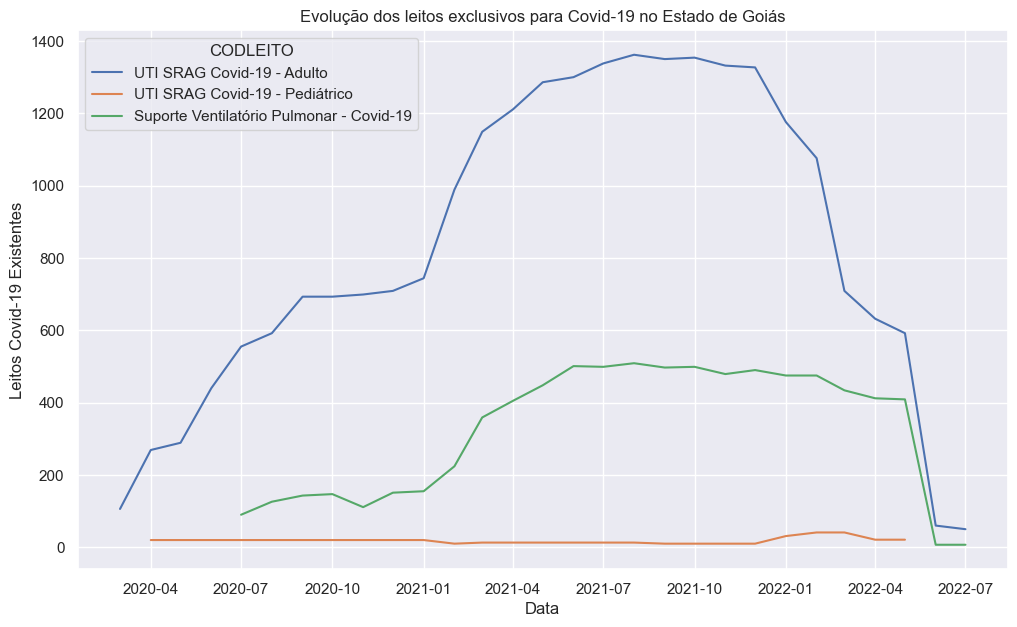

In [38]:
# Nesta análise, verificaremos a progressão dos leitos tipo: 51, 52, 96, relacionados á Unidades de Tratamento Intensivo adulto e infantil, e suporte ventilatório pulmonar para Covid-19, respectivamente.
dfg = dataset[['COMPETEN','QT_EXIST','CNES', 'CODLEITO']].groupby(by=['CNES', 'COMPETEN', 'CODLEITO']).sum().sort_values(by=['CNES','COMPETEN']).reset_index() # Agrupando os diferentes tipos de leito do mesmo estabelecimento por competência e tipo.
dfg = dfg[dfg['CODLEITO'].isin([51, 52, 96])] # Filtrando os tipos de leito de interesse para a análise.
dfg = dfg.groupby(by=['COMPETEN','CODLEITO']).sum().sort_values(by=['COMPETEN','CODLEITO']).reset_index().drop(columns={'CNES'}) # Somando os leitos Covid-19 de todos os estabelecimento de saúde de GO por data.
dfg['CODLEITO'] = dfg['CODLEITO'].replace({51: 'UTI SRAG Covid-19 - Adulto ', 52 : 'UTI SRAG Covid-19 - Pediátrico', 96 : 'Suporte Ventilatório Pulmonar - Covid-19'})
sns.set(rc= {"figure.figsize": (12, 7)})
fig = sns.lineplot(data=dfg, x='COMPETEN', y='QT_EXIST', hue='CODLEITO').set(
    title="Evolução dos leitos exclusivos para Covid-19 no Estado de Goiás",
    xlabel='Data',
    ylabel='Leitos Covid-19 Existentes')
fig
del(dfg)

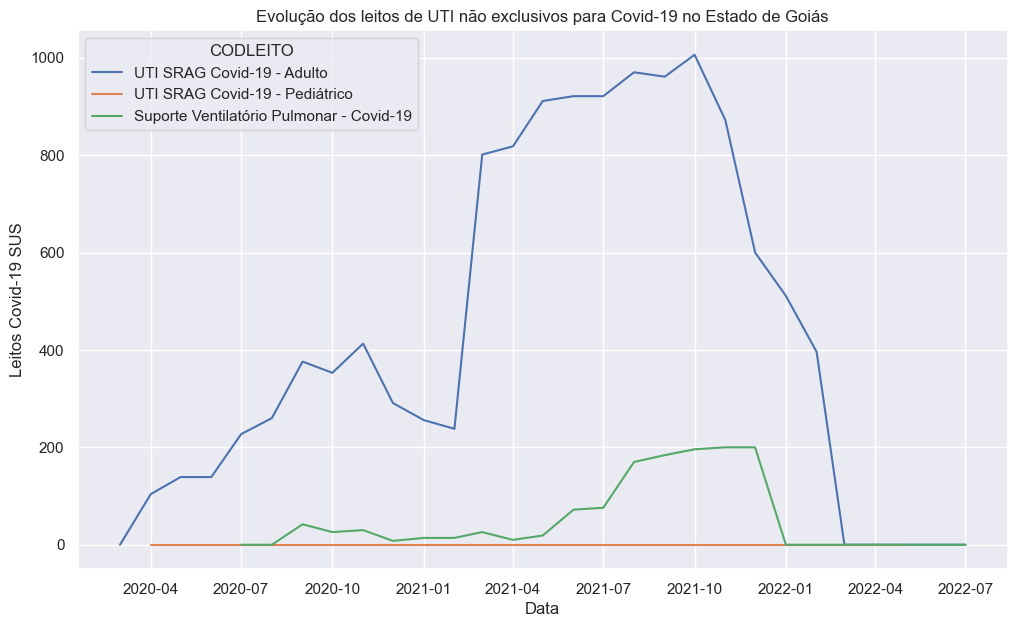

In [37]:
# Nesta análise, verificaremos a progressão dos leitos disponibilizados para o SUS do tipo: 51, 52, 96, relacionados á Unidades de Tratamento Intensivo adulto e infantil, e suporte ventilatório pulmonar para Covid-19, respectivamente.
dfg = dataset[['COMPETEN','QT_SUS','CNES', 'CODLEITO']].groupby(by=['CNES', 'COMPETEN', 'CODLEITO']).sum().sort_values(by=['CNES','COMPETEN']).reset_index()
dfg = dfg[dfg['CODLEITO'].isin([51, 52, 96])] # Filtrando os tipos de leito de interesse para a análise.
dfg = dfg.groupby(by=['COMPETEN','CODLEITO']).sum().sort_values(by=['COMPETEN','CODLEITO']).reset_index().drop(columns={'CNES'}) 
dfg['CODLEITO'] = dfg['CODLEITO'].replace({51: 'UTI SRAG Covid-19 - Adulto ', 52 : 'UTI SRAG Covid-19 - Pediátrico', 96 : 'Suporte Ventilatório Pulmonar - Covid-19'})
fig = sns.lineplot(data=dfg, x='COMPETEN', y='QT_SUS', hue='CODLEITO').set(
    title="Evolução dos leitos exclusivos para Covid-19 disponibilizados para o SUS no Estado de Goiás",
    xlabel='Data',
    ylabel='Leitos Covid-19 SUS')
fig
del(dfg)

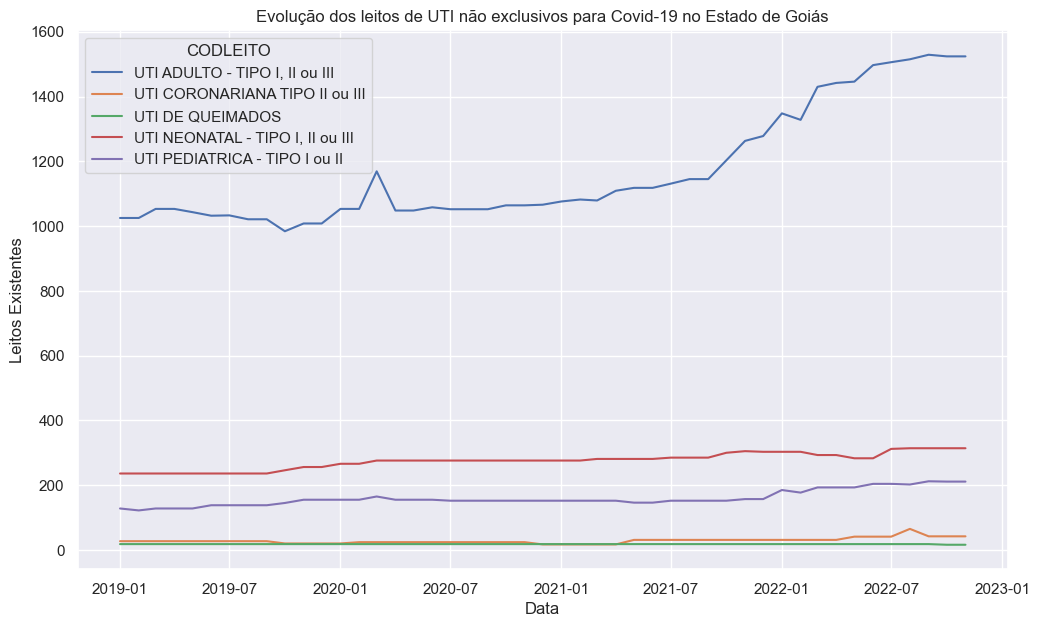

In [41]:
# Nesta análise, verificaremos a progressão dos leitos do tipo UTI que não são ligados exclusivamente à Covid-19
dfg = dataset[['COMPETEN','QT_EXIST','CNES', 'CODLEITO']].groupby(by=['CNES', 'COMPETEN', 'CODLEITO']).sum().sort_values(by=['CNES','COMPETEN']).reset_index() # Agrupando os diferentes tipos de leito do mesmo estabelecimento por competência e tipo.
dfg = dfg[dfg['CODLEITO'].isin([74, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86])] # Filtrando os tipos de leito de interesse para a análise.
dfg = dfg.groupby(by=['COMPETEN','CODLEITO']).sum().sort_values(by=['COMPETEN','CODLEITO']).reset_index().drop(columns={'CNES'}) 
dfg['CODLEITO'] = dfg['CODLEITO'].replace({74: 'UTI ADULTO - TIPO I, II ou III', # Tipo I
                                           75: 'UTI ADULTO - TIPO I, II ou III', # Tipo II
                                           76: 'UTI ADULTO - TIPO I, II ou III', # Tipo III
                                           77: 'UTI PEDIATRICA - TIPO I ou II',  # Tipo I
                                           78: 'UTI PEDIATRICA - TIPO I ou II',  # Tipo II
                                           80: 'UTI NEONATAL - TIPO I, II ou III', # Tipo I
                                           81: 'UTI NEONATAL - TIPO I, II ou III', # Tipo II
                                           82: 'UTI NEONATAL - TIPO I, II ou III', # Tipo III
                                           83: 'UTI DE QUEIMADOS',
                                           85: 'UTI CORONARIANA TIPO II ou III', # Tipo II
                                           86: 'UTI CORONARIANA TIPO II ou III'}) # Tipo III
dfg = dfg.groupby(by=['COMPETEN','CODLEITO']).sum().sort_values(by=['COMPETEN','CODLEITO']).reset_index()                                          
fig = sns.lineplot(data=dfg, x='COMPETEN', y='QT_EXIST', hue='CODLEITO').set(
    title="Evolução dos leitos de UTI não exclusivos para Covid-19 no Estado de Goiás",
    xlabel='Data',
    ylabel='Leitos Existentes')
fig
del(dfg)

In [60]:
# Verificando Número de Leitos Existentes no inicio e final do conjunto de dados.
dfg = dataset[['COMPETEN','QT_EXIST','CNES', 'CODLEITO']].groupby(by=['CNES', 'COMPETEN', 'CODLEITO']).sum().sort_values(by=['CNES','COMPETEN']).reset_index() # Agrupando os diferentes tipos de leito do mesmo estabelecimento por competência e tipo.
dfg = dfg[dfg['CODLEITO'].isin([74, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86])] # Filtrando os tipos de leito de interesse para a análise.
dfg = dfg.groupby(by=['COMPETEN']).sum().sort_values(by=['COMPETEN']).reset_index().drop(columns={'CNES','CODLEITO'}) 
display(dfg[::len(dfg)-1])
del(dfg)

,COMPETEN,QT_EXIST
0,2019-01-01,1434
46,2022-11-01,2107


Analisando os graficos acima observamos alguns pontos de destaque:
- Há uma redução considerável no número de leitos exclusivos para Covid-19 disponibilizados para o SUS no período que antecede o pico de letalidade do Covid-19 no Brasil (abril de 2021), variando de 413 para 238 leitos no período de novembro de 2020 à fevereiro de 2021.


- Há um aumento robusto do número de leitos totais e disponibilizados para o SUS após o pico histórico de contaminações no Brasil (Fevereiro de 2021), demonstrando uma estratégia responsiva da SES visando a sustentabilidade do sistema de saúde neste período de estresse da rede de atenção. No caso dos leitos disponibilizados para o SUS, o número de leitos de UTI foi de 238 para 801 no intervalo de 1 mês (fevereiro->março/2021) e continuou crescendo até outubro do mesmo ano, atingindo um pico de 1006 leitos disponíveis. Esta alteração se dá tanto pelo aquisição de novos leitos, quanto pelo aumento da disponibilização dos leitos já existentes, que permanesceu alta até 2022.


- Com o avanço da vacinação e a redução da letalidade potencial das novas variantes do SARS-CoV-2, já no ano de 2022, podemos observar um movimento de transformação dos Leitos Exclusivos para Covid-19 em Leitos de UTI Gerais, principalmente Leitos de UTI Adulto - Tipo II. Esta movimentação é importante, pois amplia a capacidade da atenção terciária para diversos agravos, passando de 1434 leitos de UTI Adulto, Pediátrica, Neonatal, Queimados e Coronáriana para 2107 durante todo o período analizado.